# Zomato Restaurant Project

Problem Statement:
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


# IMPORT THE LIBRERIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
%matplotlib inline
# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# LOAD THE DATA SET 1

In [2]:
df= pd.read_csv("zomato.csv",encoding=('ISO-8859-1'))
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
# CHECK COLUMNS
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
# CHECKING INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# CHECKING THE NUMERICAL FACTORS
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
# CHECKING THE SHAPE OF DATA SET
df.shape

(9551, 21)

In [7]:
# CHECKING THE NULLS
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# LOAD DATA SET 2

In [8]:
#reading an excel file which is attached with the dataset
df_code=pd.read_excel("Country-Code.xlsx")
df_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


# MERGE DATASETS

In [9]:
dff=pd.merge(df,df_code,on='Country Code', how='left')

In [10]:
dff.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [11]:
##To check Data Types
dff.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [12]:
# value count 
dff["Country"].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

([<matplotlib.patches.Wedge at 0x1b8d4c161c0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

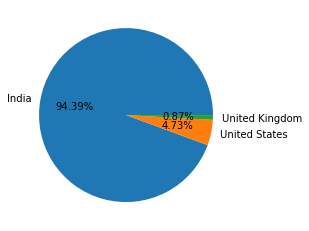

In [13]:
plt.pie(dff["Country"].value_counts().head(3),labels=dff["Country"].value_counts().head(3).index,autopct="%1.2f%%")

India is having the most strong base for zomato

C:\Users\Subham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

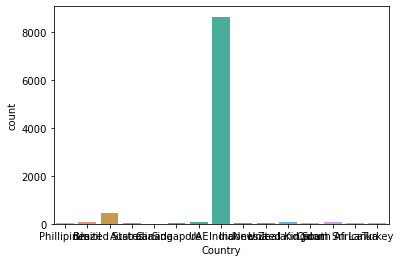

In [14]:
# to show which country has stronge base
sns.countplot(dff['Country'])

Observation:Zomato maximum records or transaction are from India After that USA and then United Kingdoms

In [15]:
#first we extract the columns related to rating and then we are converting it to data frame
rating=dff.groupby(["Aggregate rating",'Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})

In [16]:
rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observation:

1.When the rating is between 4.5 to 4.9 it means the food was Excellent

2.When the rating is between 4.0 to 4.4 it means the food was Very Good

3.When the rating is between 3.5 to 3.9 it means the food was Good

4.When the rating is between 2.5 to 3.4 it means the food was Average

5.When the rating is below 2.5 it means the food was Poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

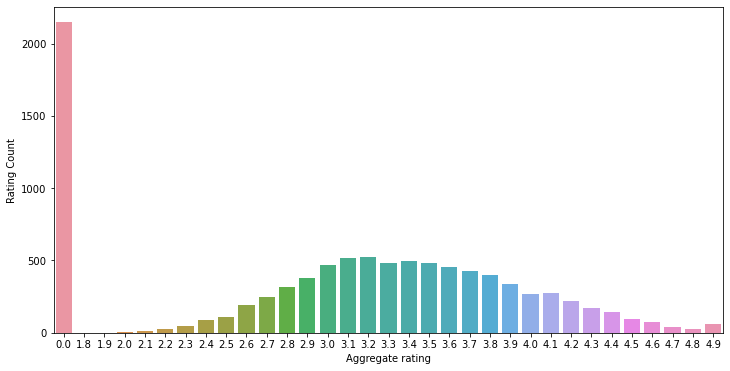

In [17]:
#plotting the count of each rating
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Rating Count",data=rating)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

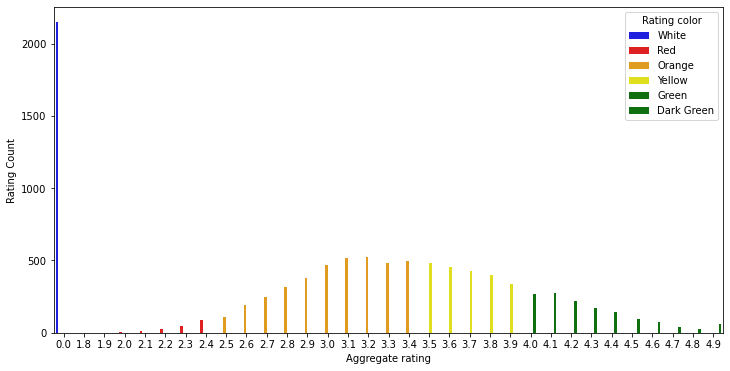

In [18]:
#plotting the count of rating with the color assigned to them in the dataset 
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Rating Count",data=rating,hue="Rating color",palette=["blue","red","orange","yellow","green","green"])


Not Rated count is very high
Maximum number of rating are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

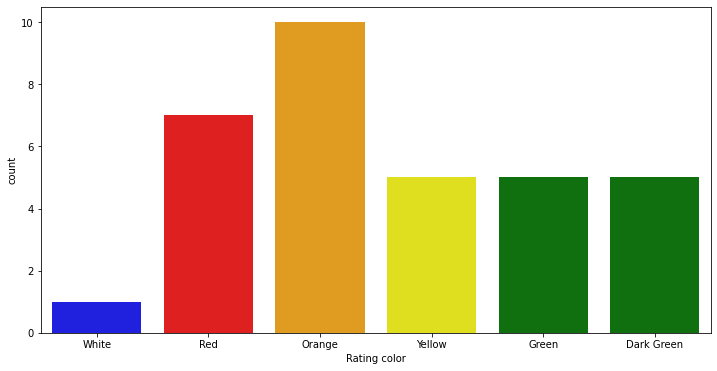

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x="Rating color",data=rating,palette=["blue","red","orange","yellow","green","green"])

In [20]:
### Find the countries name that has given 0 rating 
dff[dff['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Maximum no. of 0 ratings are from Indian Customers

In [21]:
#the currency which is used in different country 
dff.groupby(["Country",'Currency']).size().reset_index().rename(columns={0:"Count"})

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [22]:
dff["Has Online delivery"].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [23]:
#country where the resturants on zomato are providing the online delivery option 
dff[dff["Has Online delivery"]=="Yes"].groupby("Country").size()

Country
India    2423
UAE        28
dtype: int64

In [24]:
dff[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Online Deliveries are available in India and UAE

In [25]:
#city which has placed the most no. of orders on zomato
dff["City"].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

In [26]:
## Create a pie chart for top 5 cities distribution
dff.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

([<matplotlib.patches.Wedge at 0x1b8d5470550>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

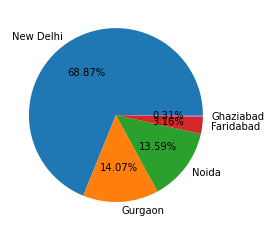

In [27]:
#representing the city in pie chart representation
plt.pie(dff["City"].value_counts().head(5),labels=dff["City"].value_counts().head(5).index,autopct="%1.2f%%")

In [28]:
dff.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [30]:
# RENAME THE COLUMNS
dff.rename(columns={'Has Table booking':'hastablebooking','Has Online delivery':'hasonlinedelevirey','Is delivering now':'isdeleviringnow','Switch to order menu':'switchtomenu','Aggregate rating':'aggregate_rating','Rating color':'rating_colour','Rating text':'rating_text','Average Cost for two':'average_cost_for_two','Price range':'price_range','Restaurant ID':'restid','Restaurant Name':'restname','Locality Verbose':'localityverbs','Country Code':'countrycode'},inplace=True)

In [30]:
dff["average_cost_for_two"].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: average_cost_for_two, Length: 140, dtype: int64

In [31]:
dff["Cuisines"].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [32]:
# check correlation
corr=dff.corr()
corr.shape

(8, 8)

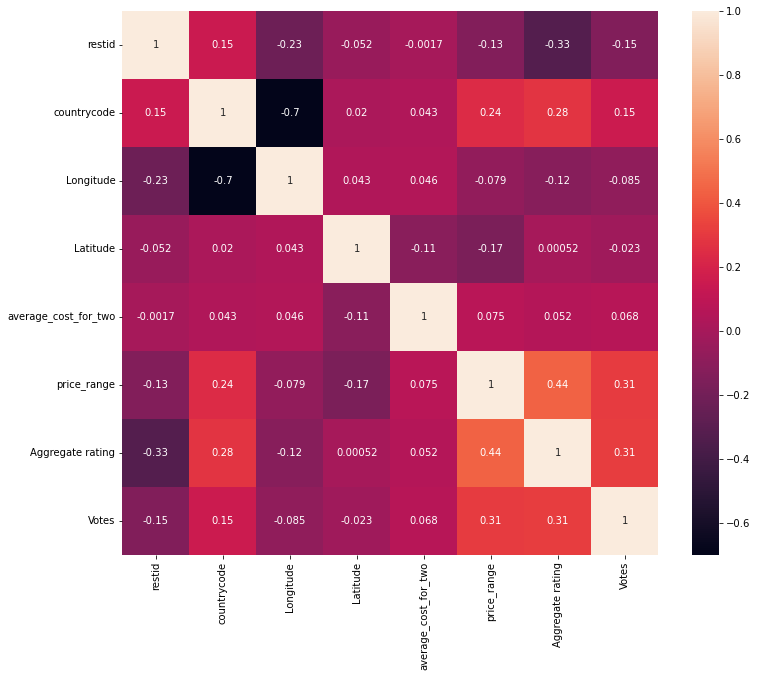

In [33]:
# plotting the heat map to find the correlation bw feature
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

THERE IS NO CORRELATION

In [31]:
dff = dff.drop(['restid','restname','localityverbs','Address','Locality','Longitude','Latitude','countrycode'], axis = 1)

In [32]:
dff.head(2)

,City,Cuisines,average_cost_for_two,Currency,hastablebooking,hasonlinedelevirey,isdeleviringnow,switchtomenu,price_range,aggregate_rating,rating_colour,rating_text,Votes,Country
0,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# remove outliers 

In [34]:
# Find the IQR (inter quantile range) to identify outliers
# 1st quantile
q1 =dff.quantile(0.25)
# 3rd quantile
q3= dff.quantile(0.75)
#IQR
iqr = q3 -q1

In [35]:
# find the high outliers for all features
high_outliers = (q3.average_cost_for_two+ (1.5 * iqr.average_cost_for_two))
high_outliers

1375.0

In [36]:
#check the indexes which have higher values
index = np.where(dff['average_cost_for_two'] > high_outliers )
index

(array([   2,    3,    4,    6,    7,    8,   19,   20,   21,  629,  630,
         631,  633,  638,  645,  652,  712,  727,  728,  730,  736,  738,
         739,  743,  744,  745,  762,  773,  785,  788,  789,  790,  791,
         794,  802,  809,  813,  820,  821,  822,  823,  838,  840,  844,
         850,  860,  891,  901,  902,  904,  926, 1114, 1115, 1122, 1128,
        1143, 1144, 1147, 1149, 1155, 1157, 1160, 1163, 1164, 1188, 1189,
        1197, 1198, 1201, 1203, 1204, 1206, 1207, 1208, 1210, 1212, 1214,
        1215, 1216, 1217, 1220, 1222, 1225, 1230, 1231, 1234, 1235, 1237,
        1239, 1240, 1242, 1244, 1247, 1248, 1249, 1251, 1252, 1253, 1255,
        1257, 1259, 1262, 1264, 1265, 1281, 1285, 1293, 1313, 1435, 1438,
        1439, 1441, 1443, 1444, 1445, 1446, 1449, 1460, 1461, 1464, 1465,
        1467, 1479, 1483, 1487, 1488, 1489, 1490, 1499, 1500, 1501, 1512,
        1513, 1516, 1518, 1521, 1522, 1523, 1524, 1525, 1527, 1536, 1542,
        1543, 1544, 1547, 1553, 1554, 

In [37]:
# drop the index which we found in the above cell
dff = dff.drop(dff.index[index])
dff.shape

(8698, 14)

In [38]:
dff.describe()

,average_cost_for_two,price_range,aggregate_rating,Votes
count,8698.000000,8698.000000,8698.000000,8698.000000
mean,437.854909,1.643826,2.564911,119.947229
std,282.048878,0.765066,1.534687,325.427179
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.200000,4.000000
50%,400.000000,1.000000,3.100000,25.000000
75%,600.000000,2.000000,3.600000,103.000000
max,1350.000000,4.000000,4.900000,9667.000000


In [39]:
dff.head(2)

,City,Cuisines,average_cost_for_two,Currency,hastablebooking,hasonlinedelevirey,isdeleviringnow,switchtomenu,price_range,aggregate_rating,rating_colour,rating_text,Votes,Country
0,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# ENCODING

In [41]:
# doing labelencder train dataset transfer into 0,1,2...
from sklearn.preprocessing import LabelEncoder
cols = ['City',"Cuisines","Currency","hastablebooking",'hasonlinedelevirey','isdeleviringnow','switchtomenu','Country','rating_colour','rating_text']
le = LabelEncoder()
for col in cols:
    dff[col] = le.fit_transform(dff[col])
dff.head()

,City,Cuisines,average_cost_for_two,Currency,hastablebooking,hasonlinedelevirey,isdeleviringnow,switchtomenu,price_range,aggregate_rating,rating_colour,rating_text,Votes,Country
0,70,759,1100,0,1,0,0,0,3,4.8,0,1,314,5
1,70,918,1200,0,1,0,0,0,3,4.5,0,1,591,5
5,72,442,1000,0,0,0,0,0,3,4.4,1,5,336,5
9,90,746,1100,0,1,0,0,0,3,4.8,0,1,532,5
10,90,748,800,0,0,0,0,0,3,4.9,0,1,1070,5


now my data is ready to make mobel building

firstely i am making  classification model

In [42]:
#Devide dataset into features and labe
y= dff['price_range']
x =dff.drop(['price_range'], axis=1)
# standard scaler
scaler=StandardScaler()
x_scaler =scaler.fit_transform (x)
#Data split into train test
x_train, x_test, y_train, y_test = train_test_split (x_scaler, y, test_size=0.3, random_state=42)


In [43]:
#Model confidence/accuracy

#write one function and call as many as times to check accuracy_score of different models 
def metric_score(clf, x_train, x_test,y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n================Train Result======")
        print (f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
     
    elif train==False:
        pred = clf.predict(x_test)
        print("\n================TEST Result======")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%") 
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))


# RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
# call the fn. and pass dataset to chek train and test score
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 100.00%

================TEST Result======
Accuracy Score: 97.32%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1296
           2       0.97      0.97      0.97       955
           3       0.91      0.91      0.91       293
           4       0.88      0.77      0.82        66

    accuracy                           0.97      2610
   macro avg       0.94      0.91      0.92      2610
weighted avg       0.97      0.97      0.97      2610



# GradientBoostER

In [47]:
#Initiate GradientBoostingclassifier
gbdt_clf= GradientBoostingClassifier ()

In [48]:
#Train the model
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [49]:
# call the fn. and pass dataset to chek train and test score
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 99.21%

================TEST Result======
Accuracy Score: 98.12%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1296
           2       0.98      0.98      0.98       955
           3       0.94      0.94      0.94       293
           4       0.95      0.91      0.93        66

    accuracy                           0.98      2610
   macro avg       0.97      0.96      0.96      2610
weighted avg       0.98      0.98      0.98      2610



# XGB

In [50]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)

C:\Users\Subham\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Subham\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:27:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
# call the fn. and pass dataset to chek train and test score
metric_score(xgb,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(xgb,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 100.00%

================TEST Result======
Accuracy Score: 98.54%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1296
           2       0.99      0.98      0.99       955
           3       0.94      0.96      0.95       293
           4       0.94      0.91      0.92        66

    accuracy                           0.99      2610
   macro avg       0.97      0.96      0.96      2610
weighted avg       0.99      0.99      0.99      2610



# SVM

In [52]:
from sklearn.svm import SVC
svc= SVC()

In [53]:
svc.fit(x_train,y_train)

SVC()

In [54]:
# call the fn. and pass dataset to chek train and test score
metric_score(svc,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(svc,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 93.74%

================TEST Result======
Accuracy Score: 91.30%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.98      0.95      0.96      1296
           2       0.88      0.94      0.91       955
           3       0.79      0.76      0.77       293
           4       0.70      0.45      0.55        66

    accuracy                           0.91      2610
   macro avg       0.84      0.78      0.80      2610
weighted avg       0.91      0.91      0.91      2610



# SO WE CAN SEE THAT SVM IS GOOD FOR MORE NO OF DATASET AND I AM CHOOSING GradientBoostER FOR THIS MODEL BUILDING


In [55]:
# save the model
# now save the model 
pickle.dump(gbdt_clf,open('cla_zomato','wb'))

now, i am making  classification model

In [56]:
#Devide dataset into features and labe
Y= dff['average_cost_for_two']
X =dff.drop(['average_cost_for_two'], axis=1)
# standard scaler
scaler=StandardScaler()
X_scaler =scaler.fit_transform (X)
#Data split into train test
X_train, X_test, Y_train, Y_test = train_test_split (X_scaler, Y, test_size=0.3, random_state=42)


# linear regression model

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [59]:
lm.fit(X_train,Y_train)
pred=lm.predict(X_test)

In [60]:
# let's check how well model fits in train data
# from adjusted r^2 score
lm.score(X_train,Y_train)

0.6560040977161987

# DECISION TREE

In [65]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
predt=dtr.predict(X_test)

In [66]:
# let's check how well model fits in train data
# from adjusted r^2 score
dtr.score(X_train,Y_train)

0.9853045316788408

# RANDOM FOREST

In [68]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
predr=rdr.predict(X_test)

In [69]:
# let's check how well model fits in train data
# from adjusted r^2 score
rdr.score(X_train,Y_train)

0.97134701635084

# bcoz decision tree is best choic so we will select decisiontree to predict the Avrage Price¶

In [70]:
# save the model
# now save the model 
pickle.dump(dtr,open('lm_zomato','wb'))